In [57]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D:\Projects\Python_Data_Project\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Akkju\AppData\Local\Temp\ipykernel_6100\804188518.py:5: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\Projects\Python_Data_Project\data_jobs.csv')


In [58]:
def cleaned_list(skills_list):
    if pd.notna(skills_list):
        return ast.literal_eval(skills_list)

df['job_skills'] = df['job_skills'].apply(cleaned_list)

In [79]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [81]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

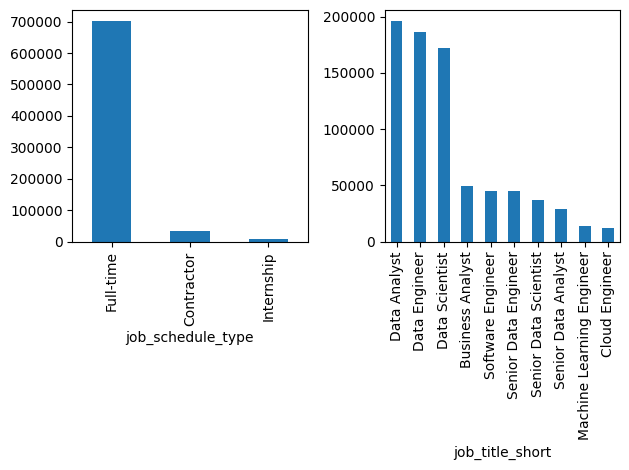

In [87]:
fig, ax = plt.subplots(1,2)

df['job_title_short'].value_counts().plot(kind='bar', ax = ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[0])

fig.tight_layout()


In [89]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skills_count')
df_skills_count.sort_values(by='skills_count',ascending= False, inplace=True)

df_skills_count

,job_skills,job_title_short,skills_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [ ]:
job_titles = ['Data Scientist','Data Engineer','Data Analyst']

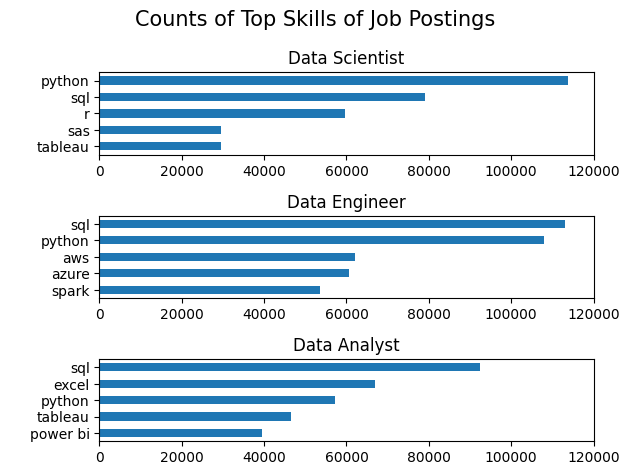

In [ ]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']== job_title].head(5) 
    df_plot.plot(kind='barh', x='job_skills',y='skills_count',ax=ax[i], title=job_title)
    fig.suptitle('Counts of Top Skills of Job Postings', fontsize = 15) #The title on top
    fig.tight_layout() #Clears overlapping
    ax[i].invert_yaxis()
    ax[i].set_ylabel(' ') #Removed ylabel info
    ax[i].legend().set_visible(False) # removed legends
    ax[i].set_xlim(0,120000) #X label limit from 0 to 120000